In [1]:
import pandas as pd

# Load training data

In [2]:
images_train = pd.read_csv('image_train.csv')

In [3]:
images_train.head()

,id,image,label,deep_features,image_array
0,24,Height: 32 Width: 32,bird,[0.242872 1.09545 0 0.39363 0 0 11.8949 0 0 0 ...,[73 77 58 71 68 50 77 69 44 120 116 83 125 120...
1,33,Height: 32 Width: 32,cat,[0.525088 0 0 0 0 0 9.94829 0 0 0 0 0 1.01264 ...,[7 5 8 7 5 8 5 4 6 7 4 7 11 5 9 11 5 9 17 11 1...
2,36,Height: 32 Width: 32,cat,[0.566016 0 0 0 0 0 9.9972 0 0 0 1.38345 0 0.7...,[169 122 65 131 108 75 193 196 192 218 221 222...
3,70,Height: 32 Width: 32,dog,[1.1298 0 0 0.778194 0 0.758051 9.83053 0 0 0....,[154 179 152 159 183 157 165 189 162 174 199 1...
4,90,Height: 32 Width: 32,bird,[1.71787 0 0 0 0 0 9.33936 0 0 0 0 0 0.412137 ...,[216 195 180 201 178 160 210 184 164 212 188 1...


# Convert image_array (string) into img array

In [77]:
images_train['img_array'] = images_train['image_array'].apply(lambda x: np.asarray(x[1:-1].split()).astype(np.float))

In [78]:
images_train.head()

,id,image,label,deep_features,image_array,img_array
0,24,Height: 32 Width: 32,bird,[0.242872 1.09545 0 0.39363 0 0 11.8949 0 0 0 ...,[73 77 58 71 68 50 77 69 44 120 116 83 125 120...,"[73.0, 77.0, 58.0, 71.0, 68.0, 50.0, 77.0, 69...."
1,33,Height: 32 Width: 32,cat,[0.525088 0 0 0 0 0 9.94829 0 0 0 0 0 1.01264 ...,[7 5 8 7 5 8 5 4 6 7 4 7 11 5 9 11 5 9 17 11 1...,"[7.0, 5.0, 8.0, 7.0, 5.0, 8.0, 5.0, 4.0, 6.0, ..."
2,36,Height: 32 Width: 32,cat,[0.566016 0 0 0 0 0 9.9972 0 0 0 1.38345 0 0.7...,[169 122 65 131 108 75 193 196 192 218 221 222...,"[169.0, 122.0, 65.0, 131.0, 108.0, 75.0, 193.0..."
3,70,Height: 32 Width: 32,dog,[1.1298 0 0 0.778194 0 0.758051 9.83053 0 0 0....,[154 179 152 159 183 157 165 189 162 174 199 1...,"[154.0, 179.0, 152.0, 159.0, 183.0, 157.0, 165..."
4,90,Height: 32 Width: 32,bird,[1.71787 0 0 0 0 0 9.33936 0 0 0 0 0 0.412137 ...,[216 195 180 201 178 160 210 184 164 212 188 1...,"[216.0, 195.0, 180.0, 201.0, 178.0, 160.0, 210..."


# Expand img array into columns per array element

In [105]:
X_train = images_train.img_array.apply(pd.Series)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,73.0,77.0,58.0,71.0,68.0,50.0,77.0,69.0,44.0,120.0,...,46.0,100.0,134.0,55.0,72.0,97.0,38.0,48.0,59.0,29.0
1,7.0,5.0,8.0,7.0,5.0,8.0,5.0,4.0,6.0,7.0,...,82.0,83.0,83.0,76.0,67.0,74.0,81.0,114.0,120.0,119.0
2,169.0,122.0,65.0,131.0,108.0,75.0,193.0,196.0,192.0,218.0,...,229.0,223.0,223.0,223.0,221.0,221.0,221.0,220.0,220.0,220.0
3,154.0,179.0,152.0,159.0,183.0,157.0,165.0,189.0,162.0,174.0,...,119.0,132.0,148.0,135.0,136.0,149.0,137.0,146.0,157.0,146.0
4,216.0,195.0,180.0,201.0,178.0,160.0,210.0,184.0,164.0,212.0,...,10.0,33.0,29.0,20.0,42.0,38.0,29.0,30.0,26.0,17.0


# Convert labels into numbers

In [81]:
images_train['label_no'] = images_train.label.astype('category').cat.codes

In [82]:
images_train.head()

,id,image,label,deep_features,image_array,img_array,label_no
0,24,Height: 32 Width: 32,bird,[0.242872 1.09545 0 0.39363 0 0 11.8949 0 0 0 ...,[73 77 58 71 68 50 77 69 44 120 116 83 125 120...,"[73.0, 77.0, 58.0, 71.0, 68.0, 50.0, 77.0, 69....",1
1,33,Height: 32 Width: 32,cat,[0.525088 0 0 0 0 0 9.94829 0 0 0 0 0 1.01264 ...,[7 5 8 7 5 8 5 4 6 7 4 7 11 5 9 11 5 9 17 11 1...,"[7.0, 5.0, 8.0, 7.0, 5.0, 8.0, 5.0, 4.0, 6.0, ...",2
2,36,Height: 32 Width: 32,cat,[0.566016 0 0 0 0 0 9.9972 0 0 0 1.38345 0 0.7...,[169 122 65 131 108 75 193 196 192 218 221 222...,"[169.0, 122.0, 65.0, 131.0, 108.0, 75.0, 193.0...",2
3,70,Height: 32 Width: 32,dog,[1.1298 0 0 0.778194 0 0.758051 9.83053 0 0 0....,[154 179 152 159 183 157 165 189 162 174 199 1...,"[154.0, 179.0, 152.0, 159.0, 183.0, 157.0, 165...",3
4,90,Height: 32 Width: 32,bird,[1.71787 0 0 0 0 0 9.33936 0 0 0 0 0 0.412137 ...,[216 195 180 201 178 160 210 184 164 212 188 1...,"[216.0, 195.0, 180.0, 201.0, 178.0, 160.0, 210...",1


# Train logistic regression using raw pixels as features

In [83]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, images_train['label_no'])

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Pick up first three images  from  the test set

In [92]:
images_test= pd.read_csv('image_test.csv')
test_subset = images_test[:3]

# Compute img array features for the selected test sub set

In [93]:
test_subset['img_array'] = test_subset['image_array'].apply(lambda x: np.asarray(x[1:-1].split()).astype(np.float))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Make predictions for the selected test subset using model trained by raw pixel features

In [94]:
print logreg.predict(test_subset.img_array.apply(pd.Series))

[3 2 3]


# Check actual labels and verify that all predictions are incorrect

In [95]:
test_subset

,id,image,label,deep_features,image_array,img_array
0,0,Height: 32 Width: 32,cat,[1.13469 0 0 0 0.0366498 0 9.3536 0 0 0 0 0 0 ...,[158 112 49 159 111 47 165 116 51 166 118 53 1...,"[158.0, 112.0, 49.0, 159.0, 111.0, 47.0, 165.0..."
1,6,Height: 32 Width: 32,automobile,[0.231359 0 0 0 0 0.226023 8.85989 0 0 0 1.306...,[160 37 13 185 49 11 209 57 14 217 58 10 230 6...,"[160.0, 37.0, 13.0, 185.0, 49.0, 11.0, 209.0, ..."
2,8,Height: 32 Width: 32,cat,[0 0 0.0344192 0 0 0 11.0375 0 0 0 0 0 0 0 0 0...,[23 19 23 19 21 28 21 16 19 65 47 40 164 131 1...,"[23.0, 19.0, 23.0, 19.0, 21.0, 28.0, 21.0, 16...."


# Create features using deep features

In [96]:
images_train['df_array'] = images_train['deep_features'].apply(lambda x: np.asarray(x[1:-1].split()).astype(np.float))

In [99]:
X_train = images_train.df_array.apply(pd.Series)

In [100]:
X_train.shape

(2005, 4096)

# Train using deep features

In [101]:
logreg.fit(X_train, images_train['label_no'])

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

# Compute deep feature based features for test subset

In [103]:
test_subset['df_array'] = test_subset['deep_features'].apply(lambda x: np.asarray(x[1:-1].split()).astype(np.float))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Make predictions using model trained by deep features.
# Verify that they are all correct now!

In [104]:
print logreg.predict(test_subset.df_array.apply(pd.Series))

[2 0 2]


# Compare accuracy of two models

# Draw images

In [156]:
import matplotlib.pyplot as plt
from array import array
import numpy as np
def draw_images(df, ids):
    for i in ids:
        fig, ax = plt.subplots(figsize=(0.75, 0.75))
        ax.imshow(np.asarray(df[i:i+1].img_array)[0].reshape((32, 32, 3)))
    plt.show()

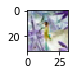

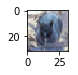

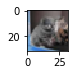

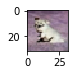

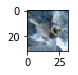

In [160]:
draw_images(images_train, range(5))

# Find similar images using nearest neighbors